<a href="https://colab.research.google.com/github/chris051091/Seminario-3/blob/master/climatologia/src/palanquero/Climatologia_Precipitaci%C3%B3n_Palanquero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_CLIMATOLOGIA = '/climatologia/figures/'
NOMBRE_ESTACION = 'palanquero'

PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'
PATH_FINAL_FIGURAS_CLIMATOLOGIA = PATH_DRIVE + PATH_CLIMATOLOGIA + NOMBRE_ESTACION + '/precipitacion/'

FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_prec.csv'



In [4]:
VARIABLE = 'PREC'
NOMBRE_EJE_Y = 'Precipitación (mm)'
VARIABLE_STR = 'Precipitación'

In [5]:
#Read the data

df = pd.read_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS,
                 sep = ';', 
                #  parse_dates = ["FECHA"],
                #  date_parser = lambda col: pd.to_datetime(col)
                )

In [6]:
df['FECHA_H'] = df['FECHA'].apply(lambda x: x[0:13])
df = df.groupby(['FECHA_H'])['PREC'].agg('sum').reset_index()
df['MES'] = df['FECHA_H'].apply(lambda x: x[5:7])
df['HORA'] = df['FECHA_H'].apply(lambda x: x[11:13])
df['ANO'] = df['FECHA_H'].apply(lambda x: x[0:4])

In [7]:
#Start every matrix

dfaux = df.groupby(['HORA', 'MES', 'ANO'])['PREC'].agg('sum').reset_index()
dfhora_ano = dfaux.groupby(['HORA', 'ANO'], group_keys=False).agg({VARIABLE : ['sum']}).reset_index(level=0)
dfhora = dfhora_ano.groupby(['HORA'], group_keys=False).agg({(VARIABLE, 'sum') : ['mean']}).reset_index(level=0)
# dfhora = dfhora_ano.groupby(['ANO'], group_keys=False).agg({VARIABLE : ['sum']}).reset_index(level=0)
dfhora['mean'] = dfhora[(VARIABLE, 'sum', 'mean')]

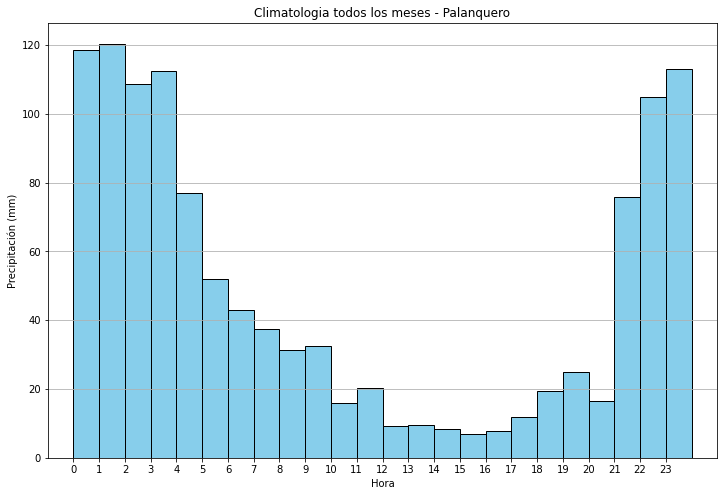

In [8]:
#I made a plot in a very automatic way, you need to improve it, I think a plot matrix es better, but you need to check
def plot_per_hour(df, titulo, name_to_save, ylimit = []):

  plt.figure(figsize = (12,8))
  df['HORA'] = df['HORA'].astype(int)

  plt.xticks(df['HORA'])
  plt.bar(df['HORA'], df['mean'], edgecolor='black', color='skyblue', width=1, align = 'edge')
  plt.xlabel("Hora")
  plt.ylabel(NOMBRE_EJE_Y)
  plt.xlim(-1, 25)
  if ylimit:
    plt.ylim(*ylimit)
  plt.title(titulo)
  plt.grid(axis='y')

  plt.savefig(PATH_FINAL_FIGURAS_CLIMATOLOGIA + f'{name_to_save}', format='png', bbox_inches = 'tight' )

plot_per_hour(dfhora, f'Climatologia todos los meses - {NOMBRE_ESTACION.capitalize()}', f'climatologia_{VARIABLE.lower()}_{NOMBRE_ESTACION}_todos_meses.png')

In [9]:
dfaux = df.groupby(['MES', 'ANO'])['PREC'].agg('sum').reset_index()
dfmes = dfaux.groupby('MES', group_keys=False).agg({VARIABLE : ['mean']}).reset_index(level=0)
dfmes['mean'] = dfmes[(VARIABLE, 'mean')]
dfaux[dfaux['MES'] == '06']

,MES,ANO,PREC
31,06,2011,63.4
32,06,2012,39.7
33,06,2013,24.0
34,06,2014,97.9
35,06,2015,13.3
36,06,2016,0.9
37,06,2017,118.7


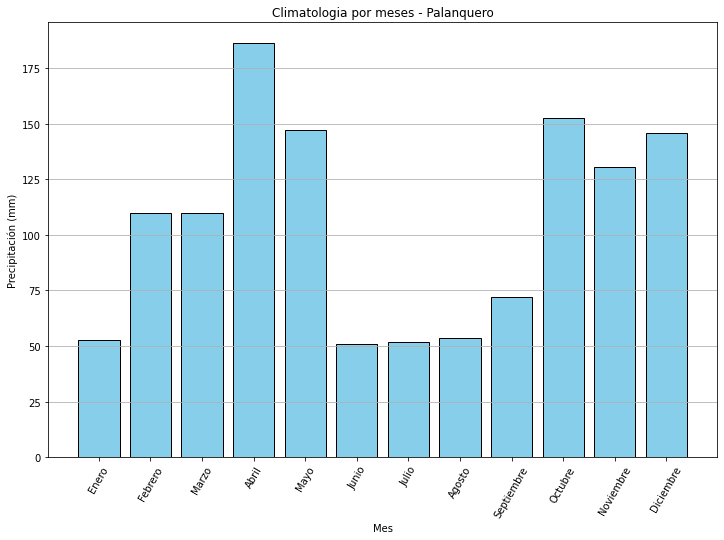

In [10]:
#Start every matrix

dfaux = df.groupby(['MES', 'ANO'])['PREC'].agg('sum').reset_index()
dfmes = dfaux.groupby('MES', group_keys=False).agg({VARIABLE : ['mean']}).reset_index(level=0)
dfmes['mean'] = dfmes[(VARIABLE, 'mean')]

def plot_per_month(df, titulo, name_to_save):
  
  plt.figure(figsize = (12,8))
  df['MES'] = df['MES'].astype(int)

  plt.bar(df['MES'], df['mean'], edgecolor='black', color='skyblue')
  plt.xlabel("Mes")
  plt.ylabel(NOMBRE_EJE_Y)
  plt.title(titulo)
  plt.grid(axis='y')

  Meses = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']

  plt.xticks(range(1, 13, 1), labels = Meses, rotation = 60)

  plt.savefig(PATH_FINAL_FIGURAS_CLIMATOLOGIA + f'{name_to_save}', format='png', bbox_inches = 'tight' )

plot_per_month(dfmes, f'Climatologia por meses - {NOMBRE_ESTACION.capitalize()}', f'climatologia_{VARIABLE.lower()}_{NOMBRE_ESTACION}_por_meses.png')

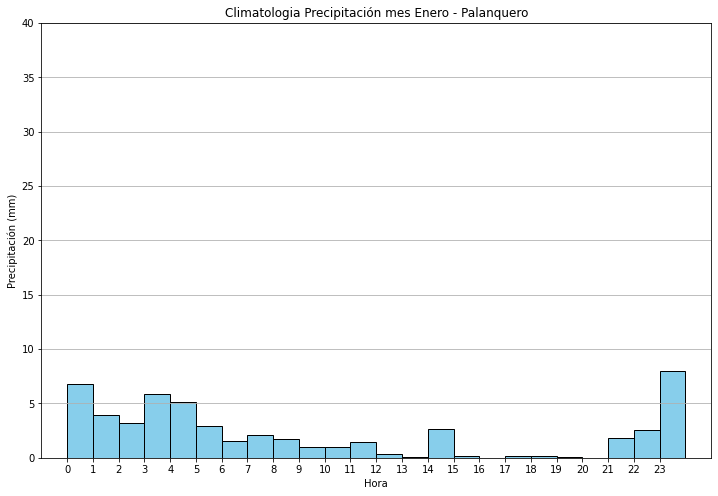

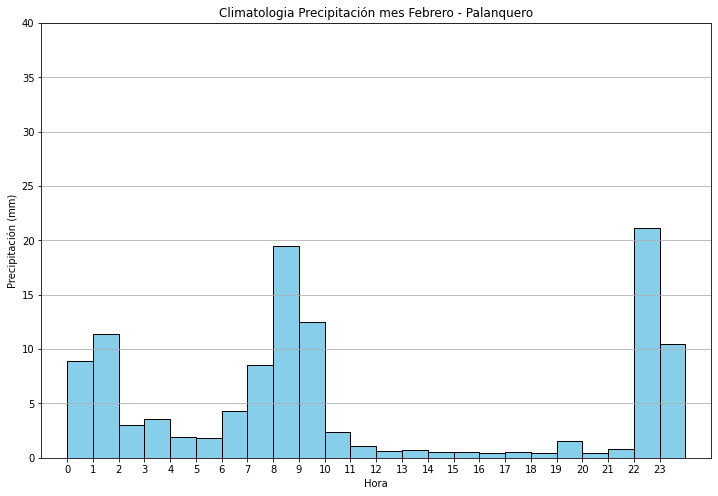

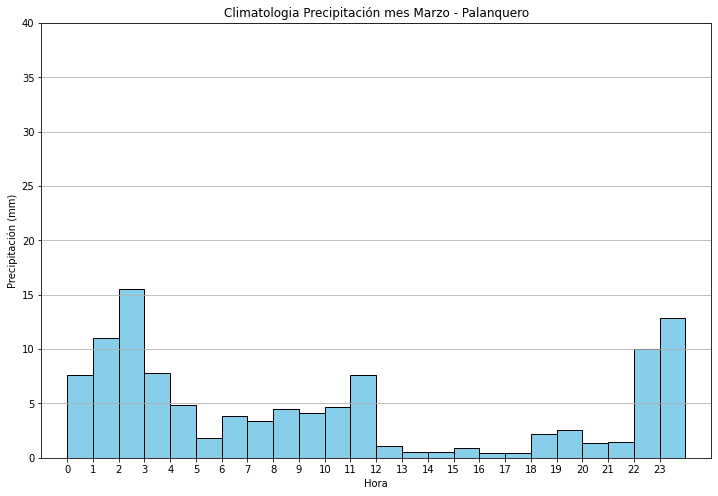

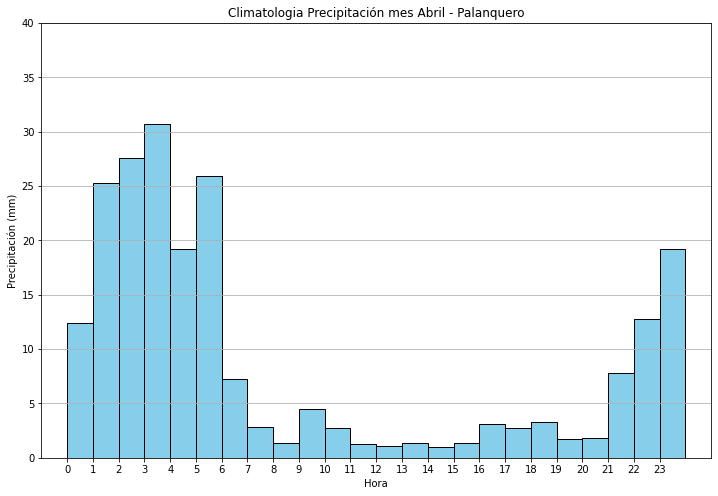

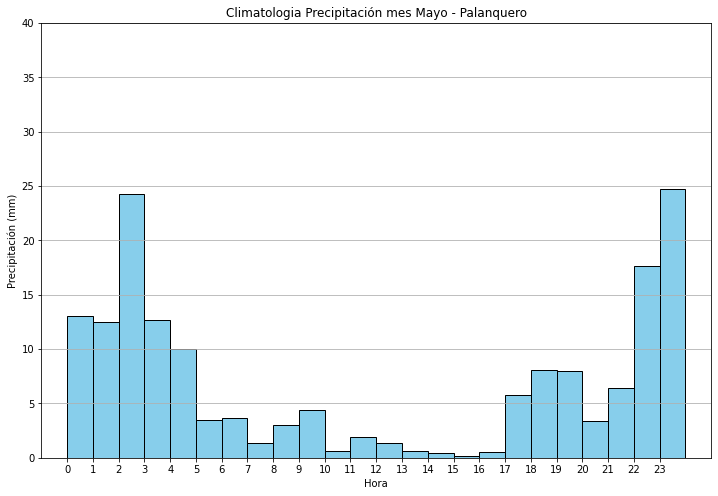

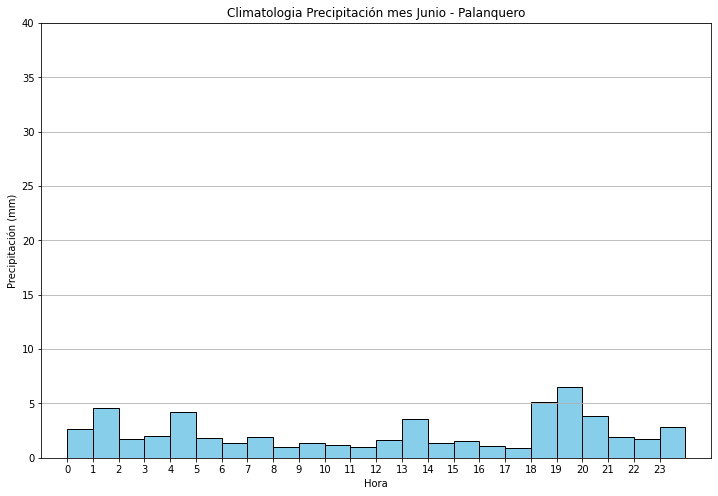

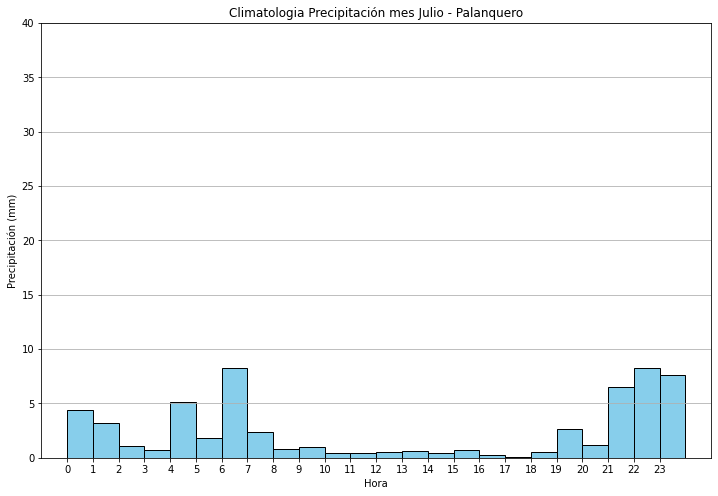

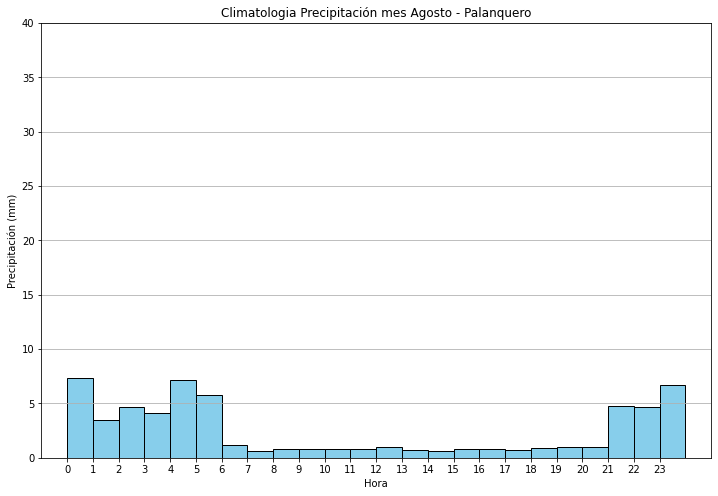

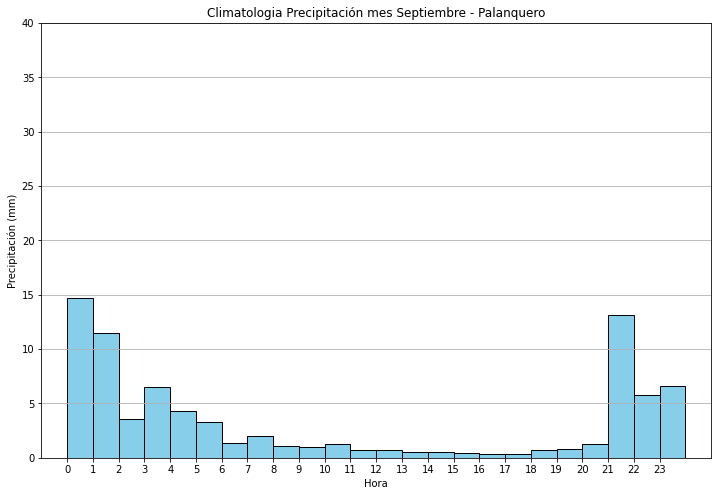

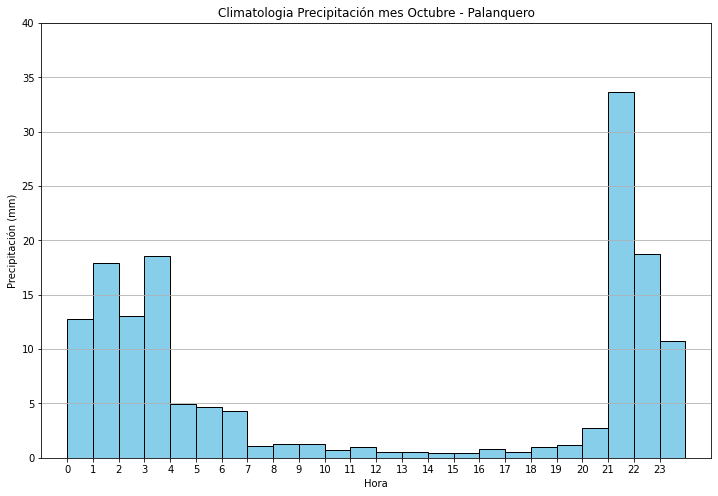

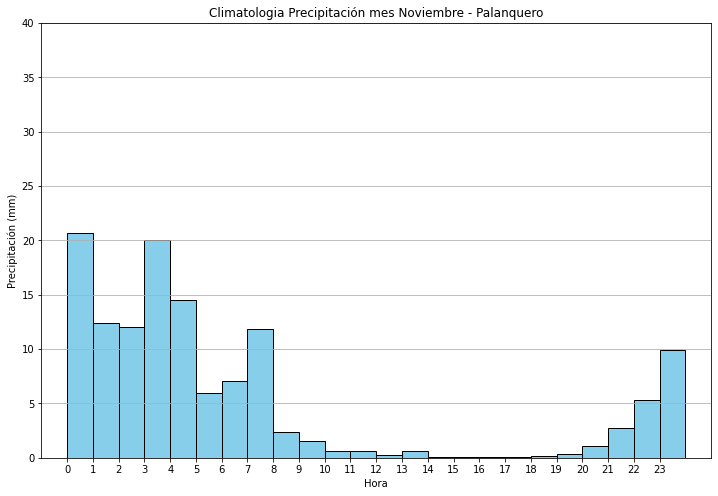

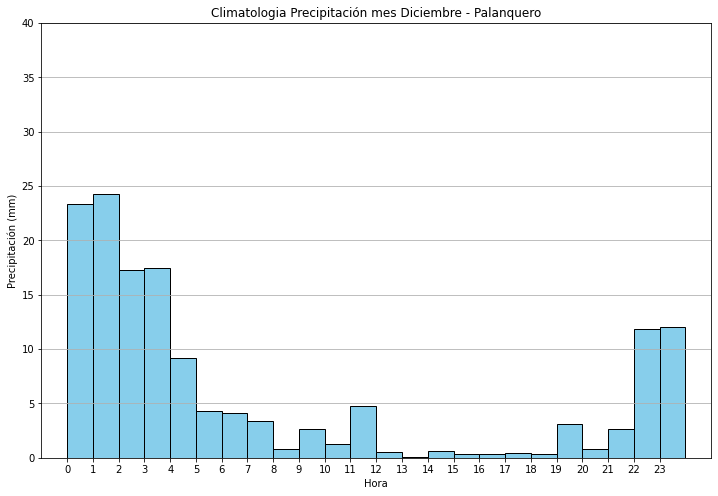

In [11]:
meses = [str(i).zfill(2) for i in range(1, 13)]
meses_str = ['Enero', 'Febrero', 
         'Marzo', 'Abril', 
         'Mayo', 'Junio', 
         'Julio', 'Agosto', 
         'Septiembre', 'Octubre', 
         'Noviembre', 'Diciembre']


for mes, mes_str in zip(meses, meses_str):
  #Merge the dataframe, so that it will be only one for every season
  dfmes = df[df['MES'].str.contains(mes)]   # DF con los datos de meses con lluvia
  dfaux = dfmes.groupby(['HORA', 'MES', 'ANO'])['PREC'].agg('sum').reset_index()
  dfhora = dfaux.groupby('HORA', group_keys=False).agg({VARIABLE : ['mean']}).reset_index(level=0)
  dfhora['mean'] = dfhora[(VARIABLE, 'mean')]

  plot_per_hour(dfhora, f'Climatologia {VARIABLE_STR.capitalize()} mes {mes_str} - {NOMBRE_ESTACION.capitalize()}', f'climatologia_{VARIABLE.lower()}_{NOMBRE_ESTACION}_mes_{mes}.png',  ylimit=[0, 40])
